# Plasticity with isotropic hardening

In [6]:
%matplotlib inline

import pylab
import numpy as np
import matplotlib.pyplot as plt
from simmit import smartplus as sim
import os

The elastic-plastic (isotropic hardening) constitutive law implemented in SMART+ is a rate independent, isotropic, von Mises type material with power-law isotropic hardening. Six parameters are required: 
1. The Young modulus $E$,
2. The Poisson ratio $\nu$,
3. The coefficient of thermal expansion $\alpha$,
4. The von Mises equivalent yield stress limit $\sigma_{Y}$,
5. The hardening parameter $k$,
6. The hardening exponent $m$.

The constitutive law is given by the set of equations 

$$\begin{matrix} {\sigma}_{ij}=L_{ijkl}\left({\varepsilon}^{\textrm{tot}}_{kl}-\alpha_{kl}\left(T-T^{\textrm{ref}}\right)-{\varepsilon}^{\textrm{p}}_{kl}\right),\\
\dot{\varepsilon}^{\textrm{p}}_{ij}=\dot{p}\Lambda_{ij}, \quad \Lambda_{ij}=\frac{3}{2}\frac{\sigma'_{ij}}{\overline{\sigma}}, \quad \sigma'_{ij}=\sigma_{ij}-\frac{1}{3}\sigma_{kk}\delta_{ij}, \quad \overline{\sigma}=\sqrt{\frac{3}{2}\sigma'_{kl}\sigma'_{kl}},\\ \Phi=\overline{\sigma}-\sigma_{Y}-kp^m\leq 0, \quad \dot{p}\geq0,~~~ \dot{p}~\Phi=0, \end{matrix}$$

where ${\varepsilon}^{\textrm{p}}_{ij}$ is the plastic strain tensor, $p$ is the plastic multiplier, $\sigma'_{ij}$ is the deviatoric part of the stress and $\overline{\sigma}$ is the von Mises equivalent stress (Lemaitre and Chaboche, 2002). Moreover, $T^{\textrm{ref}}$ is a reference temperature (usually the temperature at the beginning of the analysis). Finally, $\delta_{ij}$ denotes the 

In SMART+ the elastoplastic material constitutive law is implemented using a *return mapping algorithm*. The updated stress is provided for 1D, plane stress, and generalized plane strain/3D analysis according to the forms of elastic isotropic materials.

As a start we should input the name of the UMAT as well as the list of parameters

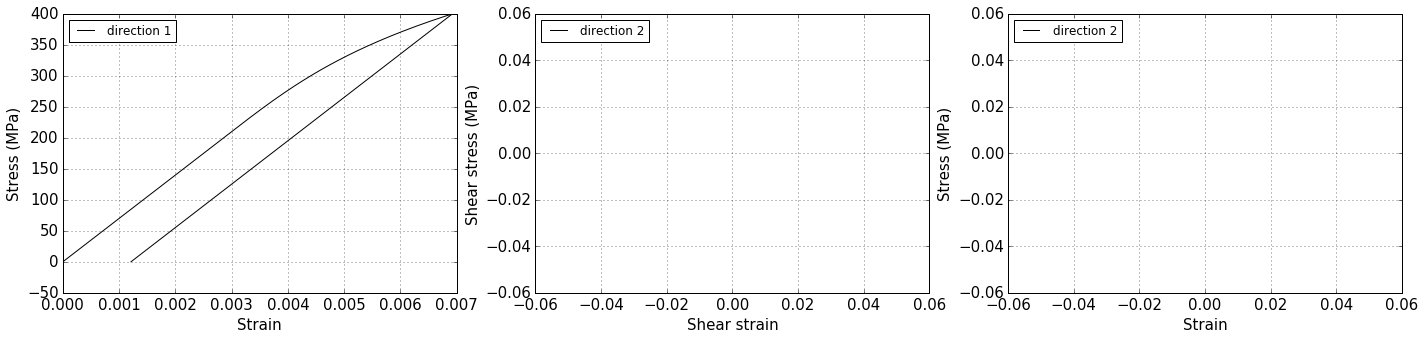

In [15]:
umat_name = 'EPICP' #This is the 5 character code for the elastic-plastic subroutine
nstatev = 8 #The number of scalar variables required, only the initial temperature is stored here

rho = 1.12 #The density of the material 
c_p = 1.64 #The specific heat capacity

E = 70000.
nu = 0.3
alpha = 1.E-5
sigma_Y = 200
H = 1500
beta = 0.3

psi_rve = 0.
theta_rve = 0.
phi_rve = 0.

props = np.array([E, nu, alpha, sigma_Y, H, beta])

dir = os.path.dirname(os.path.realpath('__file__'))
pathfile = dir + '/path_1.txt'
outputfile_1 = dir + '/results_EPICP_1.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, rho, c_p, pathfile, outputfile_1)
outputfile_1 = dir + '/results_EPICP_1_global-0.txt'

pathfile = dir + '/path_2.txt'
outputfile_2 = dir + '/results_EPICP_2.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, rho, c_p, pathfile, outputfile_2)
outputfile_2 = dir + '/results_EPICP_2_global-0.txt'

pathfile = dir + '/path_3.txt'
outputfile_3 = dir + '/results_EPICP_3.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, rho, c_p, pathfile, outputfile_3)
outputfile_3 = dir + '/results_EPICP_3_global-0.txt'


fig = plt.figure()
pylab.rcParams['figure.figsize'] = (24.0, 5.0) #configure the figure output size

ax = fig.add_subplot(1, 3, 1)

e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_1, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)

plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Strain', size = 15)
plt.ylabel('Stress (MPa)', size = 15)
plt.plot(e11,s11, c='black', label='direction 1')
plt.legend(loc=2)

ax = fig.add_subplot(1, 3, 2)

e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_2, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)

plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Shear strain', size = 15)
plt.ylabel('Shear stress (MPa)',size = 15)
plt.plot(e12,s12, c='black', label='direction 2')
plt.legend(loc=2)

ax = fig.add_subplot(1, 3, 3)

e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_3, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)

plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Strain', size = 15)
plt.ylabel('Stress (MPa)',size = 15)
plt.plot(e11,s11, c='black', label='direction 2')
plt.legend(loc=2)

plt.show()

Quick verification, we can find the uniaxial stress-strain explicitely and compare it with the previous results, for the case 1

In [11]:
#todo